<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/4%EC%A3%BC%EC%B0%A8/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime

title_list = []
url_list = []
article_list = []
date_list = []

for i in range(7):
    date= datetime.date.today() - datetime.timedelta(days = i)
    url = f'https://finance.naver.com/news/mainnews.naver?date={date}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')

    titles = soup.find_all('dd', {'class': 'articleSubject'})
    for t in titles:  
        title = t.text.strip()
        url = t.find('a').get('href')
        response = requests.get('https://finance.naver.com/' + url) # 상세 기사 페이지
        soup = BeautifulSoup(response.text, 'lxml')
        article = soup.find('div', {'class': 'articleCont'})
        
        title_list.append(title)
        url_list.append(url)
        if article is not None:
            article_list.append(article.text.strip())
        else:
            article_list.append('')
        date_list.append(date)

df = pd.DataFrame({'기사제목': title_list, '본문url': url_list, '기사본문': article_list, '날짜': date_list})
df.to_csv('article.csv', encoding = 'euc-kr')

In [2]:
df.head()

,기사제목,본문url,기사본문,날짜
0,[유럽개장]장 초반 하락세…英 0.35%↓,/news/news_read.naver?article_id=0005247941&of...,19일 유럽증시는 장 초반 하락세를 나타냈다.이날 오후 5시48분(한국시간) 기준 ...,2023-04-19
1,재료 부재 속 차익 실현…닛케이 9거래일 만에 하락 [Asia마감],/news/news_read.naver?article_id=0004877078&of...,골드만삭스19일 아시아 주요 증시는 일제히 내림세를 나타냈다.이날 일본 도쿄증시의 ...,2023-04-19
2,"英 물가 서프라이즈 여파…환율, 상승해 1320원대로[외환마감]",/news/news_read.naver?article_id=0005467397&of...,7.1원 오른 1325.7원에 마감횡보하다 英 물가 발표 이후 급등달러인덱스 101...,2023-04-19
3,"[마켓뷰] 코스피, 기관 매수에 상승 마감, 환율은 연고점 경신",/news/news_read.naver?article_id=0000894920&of...,"원·달러 환율, 7.1원 오른 1325.7원으로 연고점 경신 기관의 매...",2023-04-19
4,"[마감시황]코스피, 기관 순매수에 소폭 상승…2570선 유지",/news/news_read.naver?article_id=0011813056&of...,"기사내용 요약코스닥, 개인 순매수에 0.02%↑[서울=뉴시스] 조성우 기자 = 코스...",2023-04-19


In [4]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (2,777 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [5]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.3 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
okt = Okt()

In [8]:
from konlpy.tag import Kkma
kkma = Kkma()

In [11]:
article = df['기사본문'][0]

tokens = kkma.nouns(article)

19일 유럽증시는 장 초반 하락세를 나타냈다.이날 오후 5시48분(한국시간) 기준 영국 FTSE 지수는 전 거래일 대비 0.35% 하락한 7881.38을 보였다. 프랑스 CAC 지수는 0.06% 내린 7528.84, 독일 DAX 지수는 0.15% 하락한 1만5858.87을 기록 중이다.아시아경제 관련뉴스해당 언론사에서 선정하며 언론사 페이지(아웃링크)로 이동해 볼 수 있습니다.천재 디자이너의 월급 밀리던 회사, 14년만의 보너스롯데리아 콜라 다 마시고 보니…바퀴벌레 살아서 '꿈틀'"네가 표혜교냐" 적반하장…12년 학폭 일진 무리 신상공개미니쿠퍼 1878만, BMW 7021만원…중고차 석달새 최고 16% 하락3000만원짜리 번듯한 '빈 집'…외국인들 사들이는 이곳


In [12]:
print(tokens)

['19', '19일', '일', '유럽', '유럽증시', '증시', '장', '초반', '하락세', '이날', '오후', '5', '5시48분', '시', '48', '분', '한국', '한국시간', '시간', '기준', '영국', '지수', '전', '거래일', '대비', '0.35', '하락', '7881.38', '프랑스', '0.06', '7528.84', '독일', '0.15', '1', '1만5858.87', '만', '5858.87', '기록', '중이', '아시아', '아시아경제', '경제', '관련', '관련뉴스해당', '뉴스', '해당', '언론사', '선정', '페이지', '아웃', '아웃링크', '링크', '로', '이동', '수', '천재', '디자이너', '월급', '회사', '14', '14년만', '년', '만', '보너스', '보너스롯데', '롯데', '콜라', '바퀴', '바퀴벌레', '벌레', '표', '표혜교', '혜교', '적반하장', '12', '12년', '년', '학', '학폭', '폭', '일진', '무리', '신상', '신상공개미니쿠퍼', '공개', '미니', '쿠퍼', '1878', '1878만', '7021', '7021만원', '원', '중고', '중고차', '차', '달', '달새', '새', '최고', '16', '하락3000만원', '3000', '만원', '집', '외국인', '이곳']


In [13]:
counted_tokens = Counter(tokens)
top_20 = counted_tokens.most_common(20)
print(top_20)

[('만', 2), ('년', 2), ('19', 1), ('19일', 1), ('일', 1), ('유럽', 1), ('유럽증시', 1), ('증시', 1), ('장', 1), ('초반', 1), ('하락세', 1), ('이날', 1), ('오후', 1), ('5', 1), ('5시48분', 1), ('시', 1), ('48', 1), ('분', 1), ('한국', 1), ('한국시간', 1)]


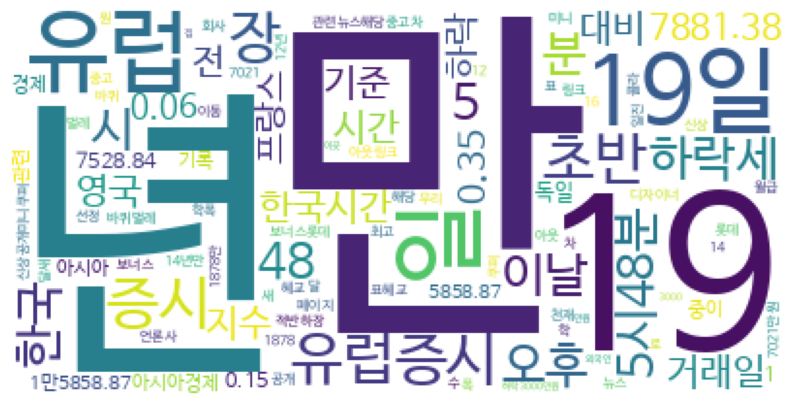

In [14]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', font_path='NanumBarunGothic.ttf')
wc.generate_from_frequencies(counted_tokens)
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [16]:
# 불용어 제거
stop_word = ['일', '19', '년', '만', '19일', '장', '5', '5시48분', '공유', '일', '시', '초', '달']
filtered_tokens = []
for t in tokens:
    if t not in stop_word:
        filtered_tokens.append(t)

counted_tokens = Counter(filtered_tokens)
top_20 = counted_tokens.most_common(20)
print(top_20)

[('유럽', 1), ('유럽증시', 1), ('증시', 1), ('초반', 1), ('하락세', 1), ('이날', 1), ('오후', 1), ('48', 1), ('분', 1), ('한국', 1), ('한국시간', 1), ('시간', 1), ('기준', 1), ('영국', 1), ('지수', 1), ('전', 1), ('거래일', 1), ('대비', 1), ('0.35', 1), ('하락', 1)]


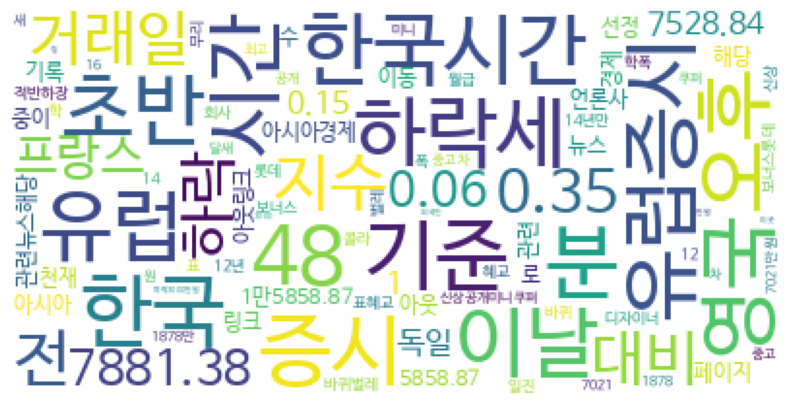

In [17]:
wc.generate_from_frequencies(counted_tokens)
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)